In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
np.random.seed(42)
price = pd.Series(
    np.random.randn(150).cumsum(),
    index=pd.date_range('2000-01-01',periods=150,freq='B')
)

In [21]:
price

2000-01-03     0.496714
2000-01-04     0.358450
2000-01-05     1.006138
2000-01-06     2.529168
2000-01-07     2.295015
                ...    
2000-07-24   -10.610549
2000-07-25   -11.847500
2000-07-26   -13.167956
2000-07-27   -12.646015
2000-07-28   -12.349030
Freq: B, Length: 150, dtype: float64

In [22]:
ma = price.rolling(20).mean()
ma

2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
                ...    
2000-07-24   -10.506898
2000-07-25   -10.707727
2000-07-26   -10.946264
2000-07-27   -11.163686
2000-07-28   -11.341086
Freq: B, Length: 150, dtype: float64

In [23]:
mstd = price.rolling(20).std()
mstd

2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2000-07-24    1.248162
2000-07-25    1.110476
2000-07-26    1.100389
2000-07-27    0.971553
2000-07-28    0.831230
Freq: B, Length: 150, dtype: float64

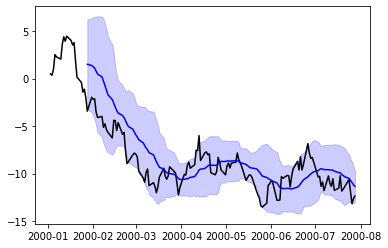

In [24]:
plt.figure()
plt.plot(price.index,price,'k')
plt.plot(ma.index,ma,'b')
plt.fill_between(mstd.index,ma-2*mstd,ma+2*mstd,color='b',alpha=0.2)

In [25]:
!pip install -U finance-datareader

In [26]:
import FinanceDataReader as fdr

In [31]:
df= fdr.DataReader('005930','2020','2021')

In [32]:
df.shape

(248, 6)

In [36]:
df['MA20'] = df['Close'].rolling(20).mean()

In [38]:
df['Close'].describe()

count      248.000000
mean     57153.225806
std       7061.870134
min      42500.000000
25%      52275.000000
50%      56800.000000
75%      60100.000000
max      81000.000000
Name: Close, dtype: float64

In [39]:
df['Close'].var()


49870009.79495885

In [40]:
np.sqrt(df['Close'].var())

7061.870134387835

In [41]:
df['Close'].var()**0.5

7061.870134387835

In [42]:
df['stdev'] = df['Close'].rolling(20).std()
df

,Open,High,Low,Close,Volume,Change,MA20,stdev
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,71655.0,2405.798915
2020-12-24,74100,78800,74000,77800,32502870,0.052774,72145.0,2611.407163
2020-12-28,79000,80100,78200,78700,40085044,0.011568,72670.0,2823.417116


In [43]:
df['UpperB'] = df['MA20'] + 2*df['stdev']
df['LowerB'] = df['MA20'] - 2*df['stdev']
df.head()

,Open,High,Low,Close,Volume,Change,MA20,stdev,UpperB,LowerB
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN


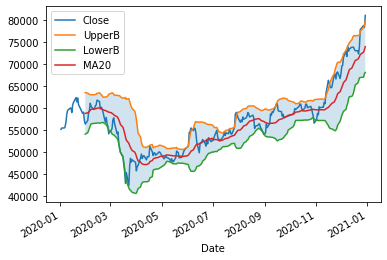

In [46]:
df[['Close','UpperB','LowerB','MA20']].plot()
plt.fill_between(df.index,df.UpperB,df.LowerB,alpha=0.2)

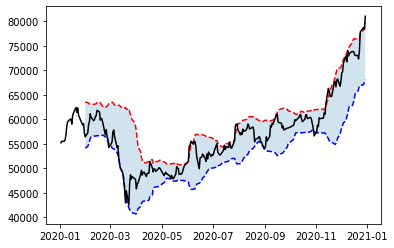

In [49]:
plt.plot(df.index,df.UpperB,'r--')
plt.plot(df.index,df.LowerB,'b--')
plt.plot(df.index,df.Close,'k')
plt.fill_between(df.index,df.UpperB,df.LowerB,alpha=0.2)

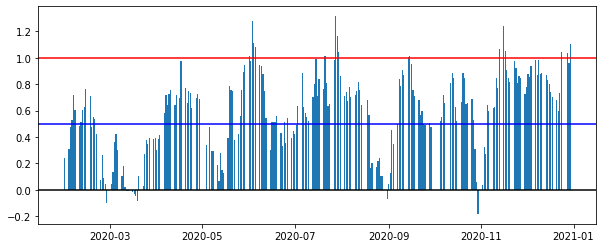

In [56]:
df['PercentB'] = (df.Close - df.LowerB) / (df.UpperB - df.LowerB)
plt.figure(figsize=(10,4))
plt.bar(df.index,df.PercentB)
plt.axhline(0,c='k')
plt.axhline(1,c='r')
plt.axhline(0.5,c='b')

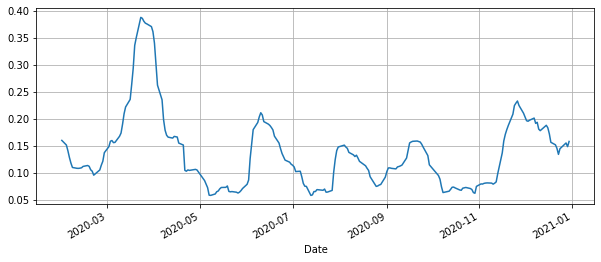

In [58]:
df['bandwidth'] = (df.UpperB - df.LowerB) / df.MA20
df['bandwidth'].plot(figsize=(10,4),grid=True)

In [59]:
df.tail()

,Open,High,Low,Close,Volume,Change,MA20,stdev,UpperB,LowerB,PercentB,bandwidth
Date,,,,,,,,,,,,
2020-12-23,72400,74000,72300,73900,19411326,0.022130,71655.0,2405.798915,76466.597831,66843.402169,0.733290,0.134299
2020-12-24,74100,78800,74000,77800,32502870,0.052774,72145.0,2611.407163,77367.814325,66922.185675,1.041375,0.144787
2020-12-28,79000,80100,78200,78700,40085044,0.011568,72670.0,2823.417116,78316.834232,67023.165768,1.033927,0.155410
2020-12-29,78800,78900,77300,78300,30339449,-0.005083,73250.0,2722.131518,78694.263036,67805.736964,0.963791,0.148649
2020-12-30,77400,81300,77300,81000,29417421,0.034483,73910.0,2923.930304,79757.860607,68062.139393,1.106205,0.158243


In [85]:
def show_bband(df,n=20,k=2):
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,4))
    df['MA20'] = df.Close.rolling(n).mean()
    df['stddev'] = df.Close.rolling(n).std()
    df['UpperB'] = df.MA20 + 2*df['stddev']
    df['LowerB'] = df.MA20 - 2*df['stddev']
    df=df[19:].copy() # 이게 가능하구나
    plt.plot(df.index,df.Close,'k',label='Close')
    plt.plot(df.index,df.MA20,label='MA29')
    plt.plot(df.index,df.UpperB,'r--',label='UpperB')
    plt.plot(df.index,df.LowerB,'b--',label='LowrB')
    plt.fill_between(df.index,df.LowerB,df.UpperB,alpha=0.2)
    plt.legend(loc='best')
    plt.title('Bollinger Band')


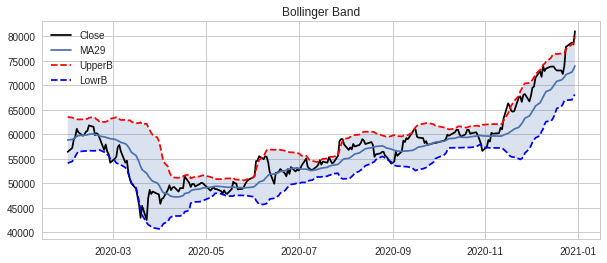

In [86]:
show_bband(df)

In [81]:
amd = fdr.DataReader('AMD','2020','2021')

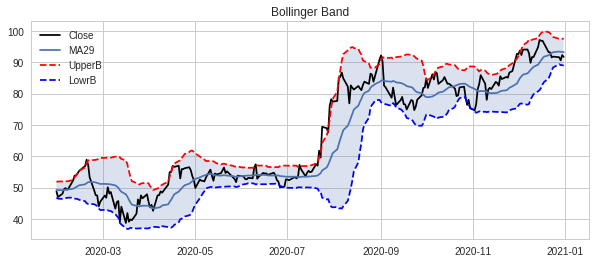

In [87]:
show_bband(amd)

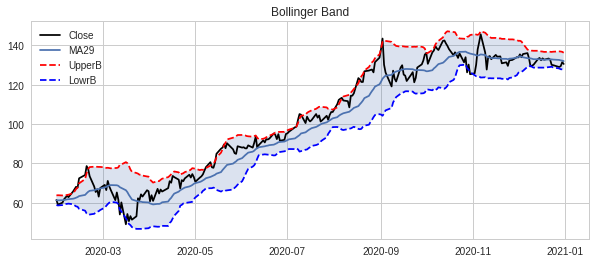

In [88]:
show_bband(fdr.DataReader('NVDA','2020','2021'))

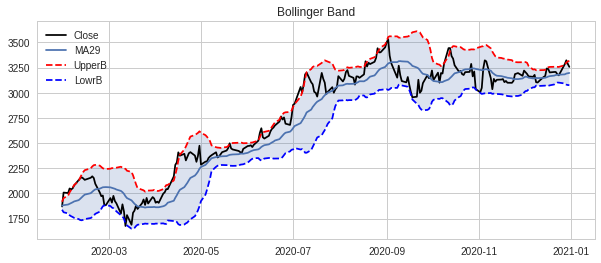

In [89]:
show_bband(fdr.DataReader('AMZN','2020','2021'))

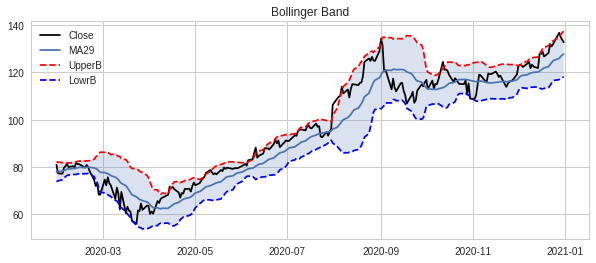

In [90]:
show_bband(fdr.DataReader('AAPL','2020','2021'))

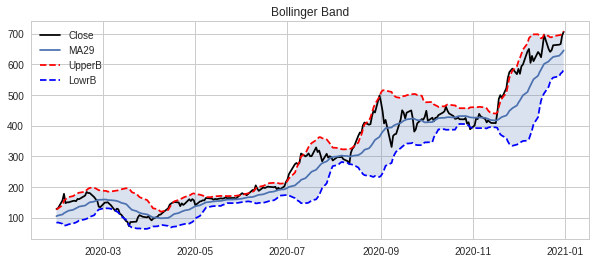

In [91]:
show_bband(fdr.DataReader('TSLA','2020','2021'))

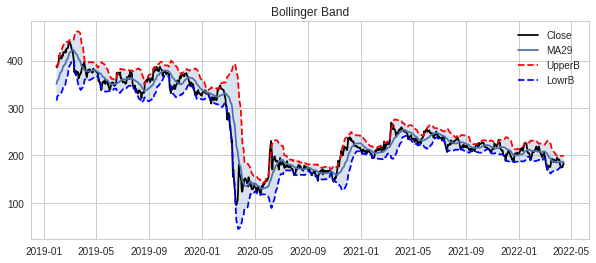

In [93]:
show_bband(fdr.DataReader('BA','2019'))